In [183]:
# Steps
# 1. Define the number of clusters - Initialize these at random
# 2a. update cluster assignment -> assign each data point to the closest cluster
# 2b. update centroid -> compute the mean of each cluster

# Repeat 2a and 2b until the cluster assignments stop changing or converge 

In [184]:
# K means is an example of Hard Clustering - each data point is assigned to a single cluster

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [186]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=2)

In [187]:
print(X.shape,y.shape)

(500, 2) (500,)


In [188]:
# not really needed
np.unique(y)

array([0, 1, 2, 3, 4])

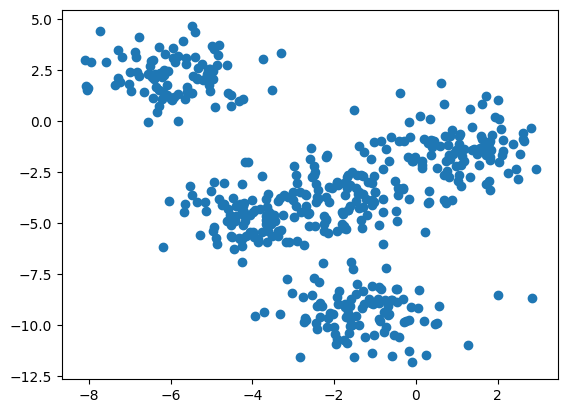

In [189]:
# DATA VISUALIZATION
plt.scatter(X[:,0],X[:,1])

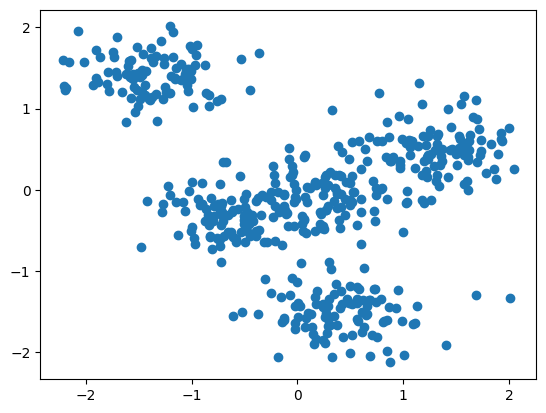

In [190]:
# Normalize the data
def normalize(X):
    u=X.mean(axis=0)
    std=X.std(axis=0)
    return (X-u)/std

# Each feature to have same scale
X=normalize(X)
plt.scatter(X[:,0],X[:,1])

In [191]:
# Init the k-center for for k clusters
k=5
colors=['green','red','blue','yellow','orange']
n_features=X.shape[1]

centroids={}

for i in range(k):

    cluster_center=2*(2*np.random.random((n_features,))-1)
    
    centroids[i]={
        'center':cluster_center,
        'color':colors[i],
        'points':[]
    }



In [192]:
# Step 2a
def distance(p,q):
    return np.sqrt(np.sum((p-q)**2))

def assignPointToCluster(X,centroids):
    m=X.shape[0]
    for i in range(m):
        cdist=[]
        cx=X[i]
        # Compute distance of point from each cluster center
        for j in range(k):
            dist=distance(centroids[j]['center'],cx)
            cdist.append(dist)
            
        clusterId=np.argmin(cdist)
        # Assign point to the cluster whose center is closest to it
        centroids[clusterId]['points'].append(cx)

In [193]:
# Step 2b
def updateClusterCenter(centroids):
    # Update every cluster center according to the mean of the points in it
    for i in range(k):
        pts=np.array(centroids[i]['points'])

        # if cluster have non zero points
        if pts.shape[0]>0:
            new_center=pts.mean(axis=0)
            centroids[i]['center']=new_center
            centroids[i]['points']=[] # clear the list for step 2a

In [194]:
def plotClusters(centroids):
    for kx in range(k):
        pts=np.array(centroids[kx]['points'])
        # Plot the points
        if pts.shape[0]>0:
            plt.scatter(pts[:,0],pts[:,1],color=centroids[kx]['color'])
        
        # Plot the cluster center (centroid)
        uk=centroids[kx]['center']
        plt.scatter(uk[0],uk[1],color=centroids[kx]['color'],marker='*')

In [195]:
assignPointToCluster(X,centroids)

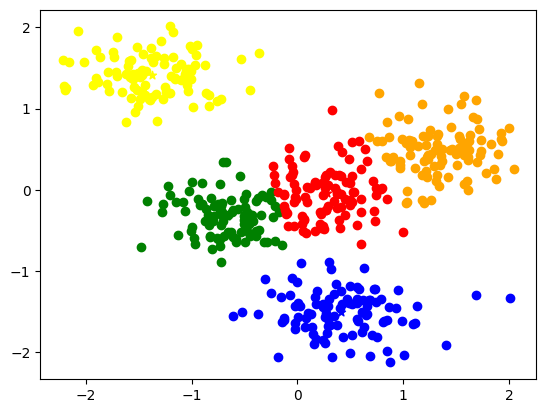

In [196]:
assignPointToCluster(X,centroids)
def kMeans(centroids,X,max_iters=40):
    for i in range(max_iters):
        updateClusterCenter(centroids)
        assignPointToCluster(X,centroids)

kMeans(centroids,X)
plotClusters(centroids)

In [197]:
# Initialization Strategy
# Improvements : K Median, K Means++, K Means Parallel,EM Algorithm, K Medoids 
# Hierarchical Clustering
# DBSCAN Algorithm
